# Residual energy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting, reduction
import pandas

%load_ext autoreload
%autoreload 2
%matplotlib widget

plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)

#COLOR = 'white'
#plt.rcParams['text.color'] = COLOR
#plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['xtick.color'] = COLOR
#plt.rcParams['ytick.color'] = COLOR


In [25]:
dataset_path = '/home/berlukas/Documents/workspace/fgsp_ws/src/fgsp/data/mission_03/'
graph_file = dataset_path + 'fgsp_graph.csv'
signal_file = dataset_path + 'fgsp_signal.csv'

graph_labels = ['ts', 'qw', 'qx', 'qy', 'qz', 'x', 'y', 'z']
signal_labels = ['residual']
graph_df = pandas.read_csv(graph_file, names=graph_labels, delimiter=',', header=None)
signal_df = pandas.read_csv(signal_file, names=signal_labels, delimiter=',', header=None)

print(f'\nRead {graph_df.size} (graph) and {signal_df.size} (signal)  entries.')


Read 2016 (graph) and 252 (signal)  entries.


## Graph Generation

2021-02-09 16:10:40,115:[WARNING](pygsp.graphs.graph.__init__): Adjacency: there are self-loops (non-zeros on the diagonal). The Laplacian will not see them.


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa00b163240>)

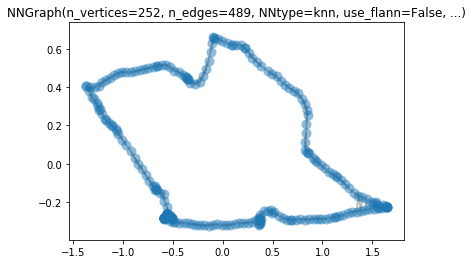

In [26]:
graph = graph_df[['x', 'y']].to_numpy()
x_residual = signal_df[['residual']].to_numpy()

G = graphs.NNGraph(graph, use_flann=False, k=3)
G.compute_fourier_basis()
G.plot()

In [27]:
x_residual_hat = G.gft(x_residual).squeeze()

print(f'Residual: $x^T L x = {G.dirichlet_energy(x_residual)}$')

Residual: $x^T L x = [[0.03023975]]$


(<Figure size 936x648 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa00b0f24e0>)

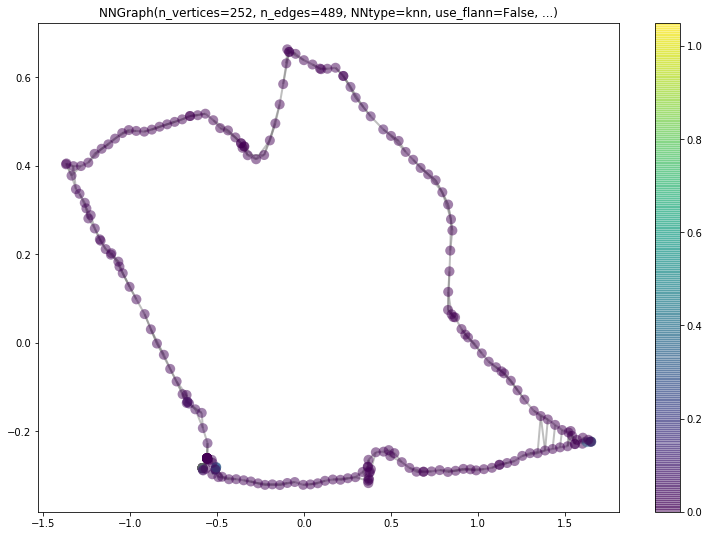

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(13, 9))
G.plot(x_residual/x_residual.max(), ax=axes)

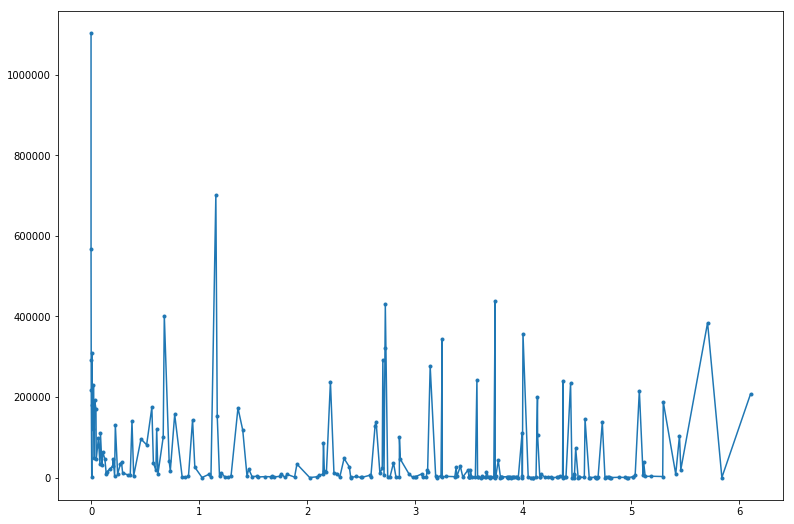

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(13, 9))
fig.subplots_adjust(hspace=0.5)

axes.plot(G.e, np.abs(x_residual_hat), '.-')